In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
!ls ../data/raw

TBSC2-20181112T130549Z-001.zip tubes2_HeartDisease_train.csv
description.xlsx               ~$description.xlsx
tubes2_HeartDisease_test.csv


### Initialize Path Constants

In [3]:
RAW_DATA_PATH = '../data/raw'

### Load CSV File

In [4]:
train_df = pd.read_csv('{}/tubes2_HeartDisease_train.csv'.format(RAW_DATA_PATH))
test_df = pd.read_csv('{}/tubes2_HeartDisease_test.csv'.format(RAW_DATA_PATH))

In [5]:
train_df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


In [6]:
test_df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,60,1,2,160,267,1,1,157,0,0.5,2,?,?
1,61,1,4,148,203,0,0,161,0,0,1,1,7
2,54,1,4,130,242,0,0,91,1,1,2,?,?
3,48,1,4,120,260,0,0,115,0,2,2,?,?
4,57,0,1,130,308,0,0,98,0,1,2,?,?


## Rename Column Names

So it's easier to read..

In [7]:
from copy import deepcopy

test_columns_replacement = {
    'Column1': 'age',
    'Column2': 'sex',
    'Column3': 'chest_pain_type',
    'Column4': 'resting_blood_pressure',
    'Column5': 'serum_cholestrol',
    'Column6': 'fasting_blood_sugar',
    'Column7': 'resting_ECG',
    'Column8': 'max_heart_rate_achieved',
    'Column9': 'excercise_induced_angina',
    'Column10': 'ST_depression',
    'Column11': 'peak_exercise_ST_segment',
    'Column12': 'num_of_major_vessels',
    'Column13': 'thal',
}

train_columns_replacement = test_columns_replacement.copy()
train_columns_replacement['Column14'] = 'heart_disease_diagnosis'

train_df = train_df.rename(columns=train_columns_replacement)

test_df = test_df.rename(columns=test_columns_replacement)

In [8]:
train_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestrol,fasting_blood_sugar,resting_ECG,max_heart_rate_achieved,excercise_induced_angina,ST_depression,peak_exercise_ST_segment,num_of_major_vessels,thal,heart_disease_diagnosis
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


In [9]:
test_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestrol,fasting_blood_sugar,resting_ECG,max_heart_rate_achieved,excercise_induced_angina,ST_depression,peak_exercise_ST_segment,num_of_major_vessels,thal
0,60,1,2,160,267,1,1,157,0,0.5,2,?,?
1,61,1,4,148,203,0,0,161,0,0,1,1,7
2,54,1,4,130,242,0,0,91,1,1,2,?,?
3,48,1,4,120,260,0,0,115,0,2,2,?,?
4,57,0,1,130,308,0,0,98,0,1,2,?,?


## Exploratory Data Analysis

### Check For Null Values

#### Nan values null

In [10]:
train_df.isnull().sum()

age                         0
sex                         0
chest_pain_type             0
resting_blood_pressure      0
serum_cholestrol            0
fasting_blood_sugar         0
resting_ECG                 1
max_heart_rate_achieved     0
excercise_induced_angina    0
ST_depression               0
peak_exercise_ST_segment    0
num_of_major_vessels        0
thal                        0
heart_disease_diagnosis     0
dtype: int64

In [11]:
test_df.isnull().sum()

age                         0
sex                         0
chest_pain_type             0
resting_blood_pressure      0
serum_cholestrol            0
fasting_blood_sugar         0
resting_ECG                 0
max_heart_rate_achieved     0
excercise_induced_angina    0
ST_depression               0
peak_exercise_ST_segment    0
num_of_major_vessels        0
thal                        0
dtype: int64

#### Dataset specific null type

Column with values '?' in the dataset is null values a well

In [12]:
def pad_text(text, target_length):
    assert(len(text) <= target_length)
    return text + (' ' * (target_length - len(text)))

def print_data_null_encoded(data):
    for column in data.columns:
        null_values = data[column].apply(lambda x: x == '?')
        print('{}: {} ({} %)'.format(pad_text(column, 25),
                                     sum(null_values),
                                     sum(null_values) * 100 / data.shape[0]))

In [13]:
print('==== Train Data ====')
print_data_null_encoded(train_df)

print('\n\n')

print('==== Test Data ====')
print_data_null_encoded(test_df)

==== Train Data ====
age                      : 0 (0.0 %)
sex                      : 0 (0.0 %)
chest_pain_type          : 0 (0.0 %)
resting_blood_pressure   : 47 (6.033376123234916 %)
serum_cholestrol         : 24 (3.0808729139922977 %)
fasting_blood_sugar      : 78 (10.012836970474968 %)
resting_ECG              : 1 (0.12836970474967907 %)
max_heart_rate_achieved  : 44 (5.648267008985879 %)
excercise_induced_angina : 44 (5.648267008985879 %)
ST_depression            : 49 (6.290115532734275 %)
peak_exercise_ST_segment : 262 (33.632862644415916 %)
num_of_major_vessels     : 514 (65.98202824133504 %)
thal                     : 408 (52.374839537869065 %)
heart_disease_diagnosis  : 0 (0.0 %)



==== Test Data ====
age                      : 0 (0.0 %)
sex                      : 0 (0.0 %)
chest_pain_type          : 0 (0.0 %)
resting_blood_pressure   : 12 (8.51063829787234 %)
serum_cholestrol         : 6 (4.25531914893617 %)
fasting_blood_sugar      : 12 (8.51063829787234 %)
resting_ECG      

The above data shows that some of the columns (*num_of_major_vessels*,*thal*) majority values are null. Null values cannot be used in the model and need to be solved. There are several methods to solve this null value problem. One of the methods is imputing null values to some value that could represent the data well.

### Attribute Analysis

####  Heart Disease Diagnosis

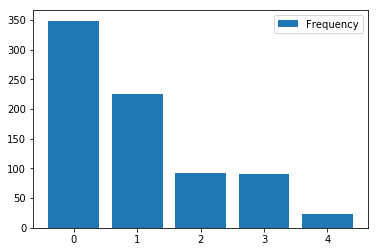

In [14]:
label_count = {}
label = train_df['heart_disease_diagnosis']

for i in range(5):
    label_count[str(i)] = label.loc[label ==i].count()

plt.bar(label_count.keys(), [label_count[str(i)] for i in range(5)], label="Frequency")
leg = plt.legend()
plt.show()

The figure above shows the distribution of the labels of the data. We can see that it declines as the label values increases. This implies that the worse the diagnosis is, the occurence of the diagnosis is much rarer.

#### Age

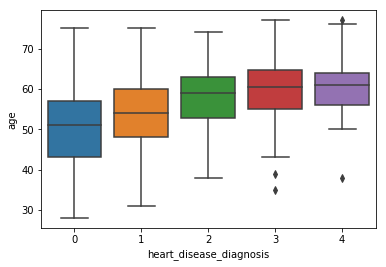

In [15]:
sns.boxplot(x="heart_disease_diagnosis", y="age", data=train_df)
plt.show()

The figure above shows the boxplot of the age of the diagnosed people. We can see that the median value of each group of heart diagnosis increases as the diagnosis goes worse. This implies that the older the person is, there is much more chance to be diagnosed a worse heart disease diagnosis. 

### Sex 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


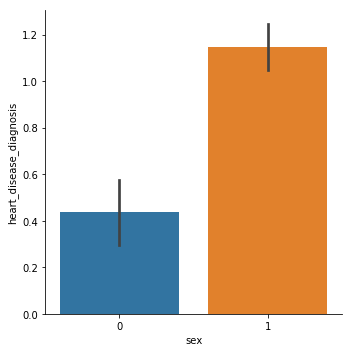

In [16]:
sns.catplot(x="sex", y="heart_disease_diagnosis", data=train_df, kind='bar')
plt.show()

The figure above shows the catplot of the sex of the diagnosed people. Sex number 1 (male) is much more prone to the worse heart disease diagnosis.

#### Chest Pain Type

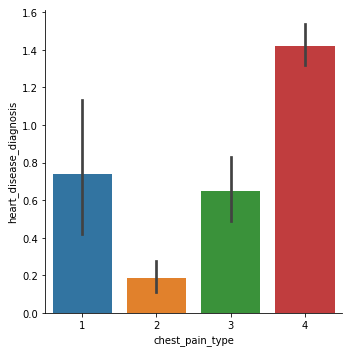

In [17]:
sns.catplot(x="chest_pain_type", y="heart_disease_diagnosis", 
            data=train_df.loc[train_df['chest_pain_type'].astype(str) != '?'], kind='bar')
plt.show()

The figure above shows the cat plot of the chest pain type for each heart disease diagnosis. For the worst heart disease diagnosis, chest pain type 4 is dominant.

### Resting Blood Pressure

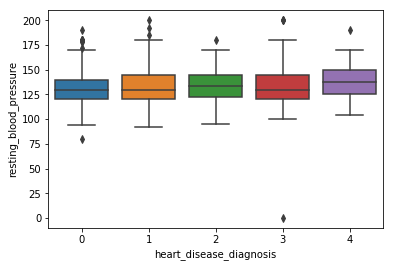

In [18]:
clean_data = train_df.loc[train_df['resting_blood_pressure'].astype(str) != '?' ]
clean_data = clean_data[['resting_blood_pressure', 'heart_disease_diagnosis']].astype(int)
sns.boxplot(x="heart_disease_diagnosis", y="resting_blood_pressure", 
            data=clean_data)
plt.show()

The figure above shows the box plot of the resting blood pressure for each diagnosed person. There is no apparent difference between the five heart disease category. This shows a low variance of data.

### Serum Cholestrol 

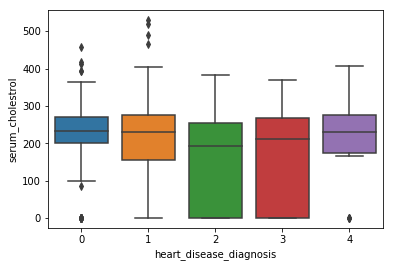

In [19]:
clean_data = train_df.loc[train_df['serum_cholestrol'].astype(str) != '?' ]
clean_data = clean_data[['serum_cholestrol', 'heart_disease_diagnosis']].astype(int)
sns.boxplot(x="heart_disease_diagnosis", y="serum_cholestrol", 
            data=clean_data)
plt.show()

The figure above shows the box plot of the serum cholestrol for each diagnosed person. There are a lot of zero values in the data, making the heart disease diagnosis 2 and 3 have a really wide boxplot.    

### Resting ECG

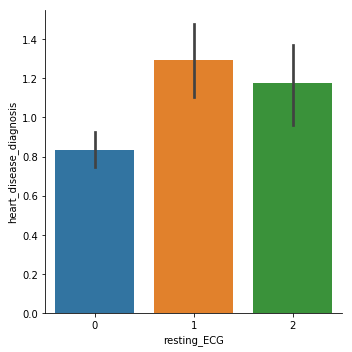

In [20]:
clean_data = train_df.loc[train_df['resting_ECG'].astype(str) != '?']
clean_data = clean_data.loc[~clean_data['resting_ECG'].isna()]
clean_data = clean_data[['resting_ECG', 'heart_disease_diagnosis']].astype(int)
sns.catplot(x="resting_ECG", y="heart_disease_diagnosis", 
            data=clean_data, kind='bar')
plt.show()

The figure above shows the catplot of the resting ECG for each diagnosed person. There is no apparent difference between the 3 type of resting ECG, looking at the frequency of each heart disease category

### Max Heart Rate Achieved

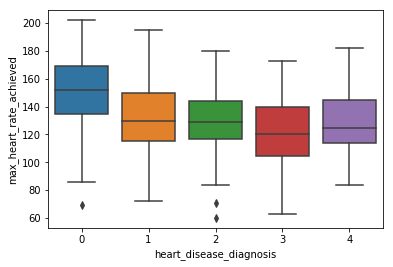

In [21]:
clean_data = train_df.loc[train_df['max_heart_rate_achieved'].astype(str) != '?' ]
clean_data = clean_data[['max_heart_rate_achieved', 'heart_disease_diagnosis']].astype(int)
sns.boxplot(x="heart_disease_diagnosis", y="max_heart_rate_achieved", 
            data=clean_data)
plt.show()

The figure above shows the box plot of the max heart rate achieved for each person. The max heart rate is higher when the person is not diagnosed with a heart disease. 

### Exercise Induced Angina

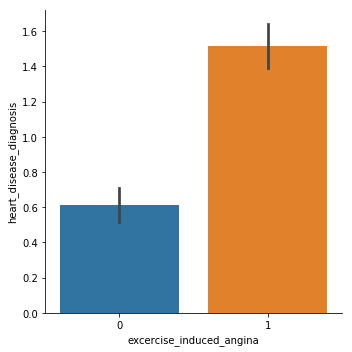

In [22]:
clean_data = train_df.loc[train_df['excercise_induced_angina'].astype(str) != '?']
clean_data = clean_data.loc[~clean_data['excercise_induced_angina'].isna()]
clean_data = clean_data[['excercise_induced_angina', 'heart_disease_diagnosis']].astype(int)
sns.catplot(x="excercise_induced_angina", y="heart_disease_diagnosis", 
            data=clean_data, kind='bar')
plt.show()

The figure above shows the catplot of the exercise induced angina for each diagnosed person. There is no apparent difference between the 2 type of exercise induced angina, looking at the frequency of each heart disease category

### ST Depression

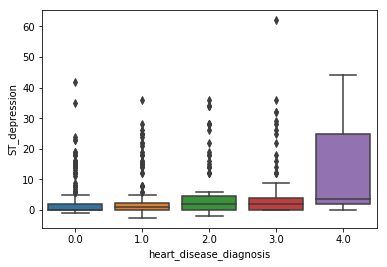

In [23]:
clean_data = train_df.loc[train_df['ST_depression'].astype(str) != '?' ]
clean_data = clean_data[['ST_depression', 'heart_disease_diagnosis']].astype(float)
sns.boxplot(x="heart_disease_diagnosis", y="ST_depression", 
            data=clean_data)
plt.show()

The figure above shows the box plot of the ST Depression for each person. There is a very low variance for the ST depression for each of the heart diagnosis. 

### Peak Exercise ST Segment

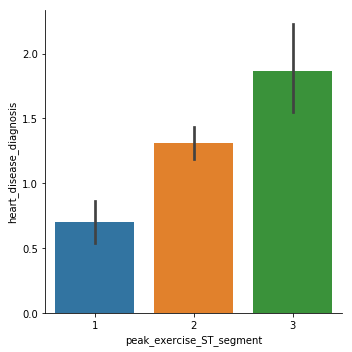

In [24]:
clean_data = train_df.loc[train_df['peak_exercise_ST_segment'].astype(str) != '?']
clean_data = clean_data.loc[~clean_data['peak_exercise_ST_segment'].isna()]
clean_data = clean_data[['peak_exercise_ST_segment', 'heart_disease_diagnosis']].astype(int)
sns.catplot(x="peak_exercise_ST_segment", y="heart_disease_diagnosis", 
            data=clean_data, kind='bar')
plt.show()

The figure above shows the catplot of the peak exercise ST segment for each diagnosed person. There is no apparent difference between the 2 type of exercise induced angina, looking at the frequency of each heart disease category

### Number of Major Vessels

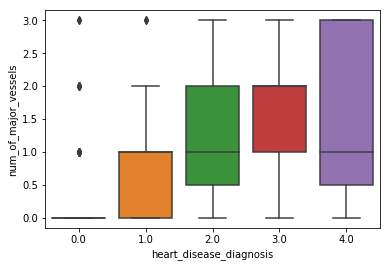

In [25]:
clean_data = train_df.loc[train_df['num_of_major_vessels'].astype(str) != '?' ]
clean_data = clean_data[['num_of_major_vessels', 'heart_disease_diagnosis']].astype(float)
sns.boxplot(x="heart_disease_diagnosis", y="num_of_major_vessels", 
            data=clean_data)
plt.show()

The figure above shows the box plot of the number of major vessels for each person. No major vessel is found in the person with negative heart disease diagnosis. 

### Thal

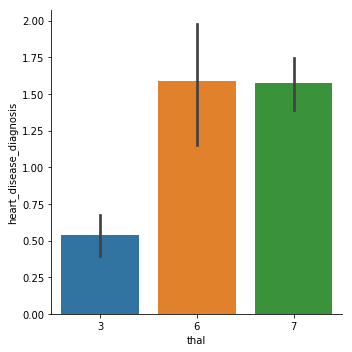

In [26]:
clean_data = train_df.loc[train_df['thal'].astype(str) != '?']
clean_data = clean_data.loc[~clean_data['thal'].isna()]
clean_data = clean_data[['thal', 'heart_disease_diagnosis']].astype(int)
sns.catplot(x="thal", y="heart_disease_diagnosis", 
            data=clean_data, kind='bar')
plt.show()

The figure above shows the catplot of the thal for each diagnosed person. There is no apparent difference between the 3 type of thal, looking at the frequency of each heart disease category